In [1]:
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from glob import glob

# Add rpy2
%load_ext rpy2.ipython

In [2]:
%%R 

suppressPackageStartupMessages({
    library(broom)
    library(cowplot)
    library(glue)
    library(patchwork)
    library(see)
    library(tidyverse)
})

# Set cowplot theme
theme_set(theme_cowplot())

In [7]:
# Define path for derivatives directory
deriv_dir = "/Users/abry4213/data/Cogitate_MEG/derivatives"

def parse_subject_CSV(filename):
    # Read in the CSV file
    subject_data = pd.read_csv(filename)

    # Extract subject_ID from filename base name
    subject_ID = os.path.basename(filename).split("_")[0]

    # Add subject_ID to the dataframe
    subject_data["subject_ID"] = subject_ID
    
    # Return the subject data
    return(subject_data)

# Iterate over all the files in MEG_time_series with glob
All_MEG_time_series = pd.concat([parse_subject_CSV(f) for f in glob(f"{deriv_dir}/MEG_time_series/*_ses-1_meg_1000ms_all_time_series.csv")])

In [54]:
All_MEG_time_series.head()

PFC_offset_relevant_TS = All_MEG_time_series.query("relevance_type == 'Relevant non-target' & times > 1")[['subject_ID', 'times', 'Prefrontal_Cortex', 'stimulus_type']]
CS_offset_relevant_TS = All_MEG_time_series.query("relevance_type == 'Relevant non-target' & times > 1")[['subject_ID', 'times', 'Category_Selective', 'stimulus_type']]
VIS_offset_relevant_TS = All_MEG_time_series.query("relevance_type == 'Relevant non-target' & times > 1")[['subject_ID', 'times', 'V1_V2', 'stimulus_type']]
VIS_full_relevant_TS = All_MEG_time_series[['subject_ID', 'times', 'V1_V2', 'stimulus_type', 'relevance_type']]

/Users/abry4213/miniforge3/envs/annie_env/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


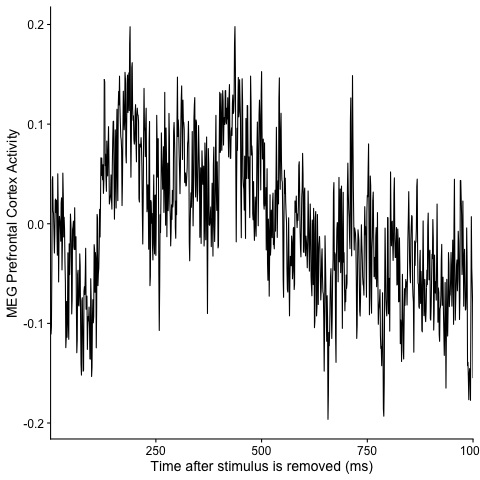

In [30]:
%%R -i PFC_offset_relevant_TS

PFC_offset_relevant_TS %>% 
    mutate(times = (times-1)*1000) %>%
    group_by(times) %>% 
    summarise(PFC_Mean = mean(Prefrontal_Cortex)) %>%
    ggplot(mapping=aes(x=times, y=PFC_Mean)) +
    ylab("MEG Prefrontal Cortex Activity") +
    xlab("Time after stimulus is removed (ms)") +
    scale_x_continuous(expand=c(0,0)) +
    geom_line()
ggsave("PFC_offset_relevant_TS.png", width=5, height=4.5, dpi=300, units='in')

In [33]:
%%R -i CS_offset_relevant_TS

CS_offset_relevant_TS %>% 
    mutate(times = (times-1)*1000) %>%
    group_by(times) %>% 
    summarise(CS_Mean = mean(Category_Selective)) %>%
    ggplot(mapping=aes(x=times, y=CS_Mean)) +
    ylab("MEG Category-Selective Activity") +
    xlab("Time after stimulus is removed (ms)") +
    scale_x_continuous(expand=c(0,0)) +
    geom_line()
ggsave("CS_offset_relevant_TS.png", width=5, height=4.5, dpi=300, units='in')

/Users/abry4213/miniforge3/envs/annie_env/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


/Users/abry4213/miniforge3/envs/annie_env/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


`summarise()` has grouped output by 'times'. You can override using the
`.groups` argument.


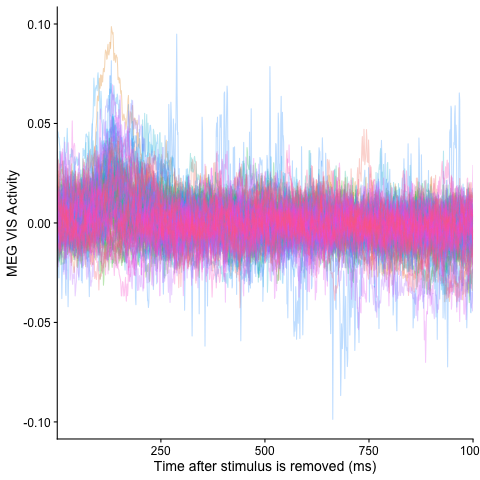

In [60]:
%%R -i VIS_offset_relevant_TS

VIS_offset_relevant_TS %>% 
    mutate(times = (times-1)*1000) %>%
    group_by(times, subject_ID) %>% 
    summarise(VIS_Mean = mean(V1_V2)) %>%
    ggplot(mapping=aes(x=times, y=VIS_Mean)) +
    ylab("MEG VIS Activity") +
    xlab("Time after stimulus is removed (ms)") +
    scale_x_continuous(expand=c(0,0)) +
    geom_line(alpha=0.3, aes(color=subject_ID)) +
    theme(legend.position="none")

In [35]:
%%R -i VIS_offset_relevant_TS

VIS_offset_relevant_TS %>% 
    mutate(times = (times-1)*1000) %>%
    group_by(times) %>% 
    summarise(VIS_Mean = mean(V1_V2)) %>%
    ggplot(mapping=aes(x=times, y=VIS_Mean)) +
    ylab("MEG VIS Activity") +
    xlab("Time after stimulus is removed (ms)") +
    scale_x_continuous(expand=c(0,0)) +
    geom_line()
ggsave("VIS_offset_relevant_TS.png", width=5, height=4.5, dpi=300, units='in')

/Users/abry4213/miniforge3/envs/annie_env/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


In [53]:
VIS_full_relevant_TS

,subject_ID,times,V1_V2,stimulus_type
0,sub-CB081,-0.500,-0.004596,False
1,sub-CB081,-0.499,-0.009691,False
2,sub-CB081,-0.498,0.011864,False
3,sub-CB081,-0.497,0.017640,False
4,sub-CB081,-0.496,0.026672,False
...,...,...,...,...
30007,sub-CA128,1.996,-0.046391,object
30008,sub-CA128,1.997,-0.040332,object
30009,sub-CA128,1.998,-0.011273,object
30010,sub-CA128,1.999,-0.025088,object


/Users/abry4213/miniforge3/envs/annie_env/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


`summarise()` has grouped output by 'times'. You can override using the
`.groups` argument.


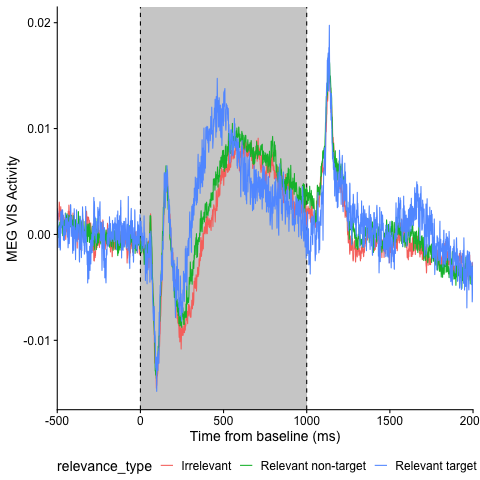

In [56]:
%%R -i VIS_full_relevant_TS

VIS_full_relevant_TS %>% 
    mutate(times = times*1000) %>%
    group_by(times, relevance_type) %>% 
    summarise(VIS_Mean = mean(V1_V2)) %>%
    ggplot(mapping=aes(x=times, y=VIS_Mean)) +
    ylab("MEG VIS Activity") +
    xlab("Time from baseline (ms)") +
    scale_x_continuous(expand=c(0,0)) +
    geom_rect(xmin=0, xmax=1000, ymin=-Inf, ymax=Inf, fill="grey80", alpha=0.2) +
    geom_vline(xintercept=0, linetype="dashed") +
    geom_vline(xintercept=1000, linetype="dashed") +
    geom_line(aes(color=relevance_type)) +
    theme(legend.position='bottom')
# ggsave("VIS_full_relevant_TS.png", width=7, height=4.5, dpi=300, units='in')